# Project 1

### Define the problem and perform Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel(r"C:\Users\dhana\OneDrive\Desktop\Election_Data.xlsx")
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [5]:
df.shape

(1525, 9)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [7]:
#Identification and treatment of any Missing Values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

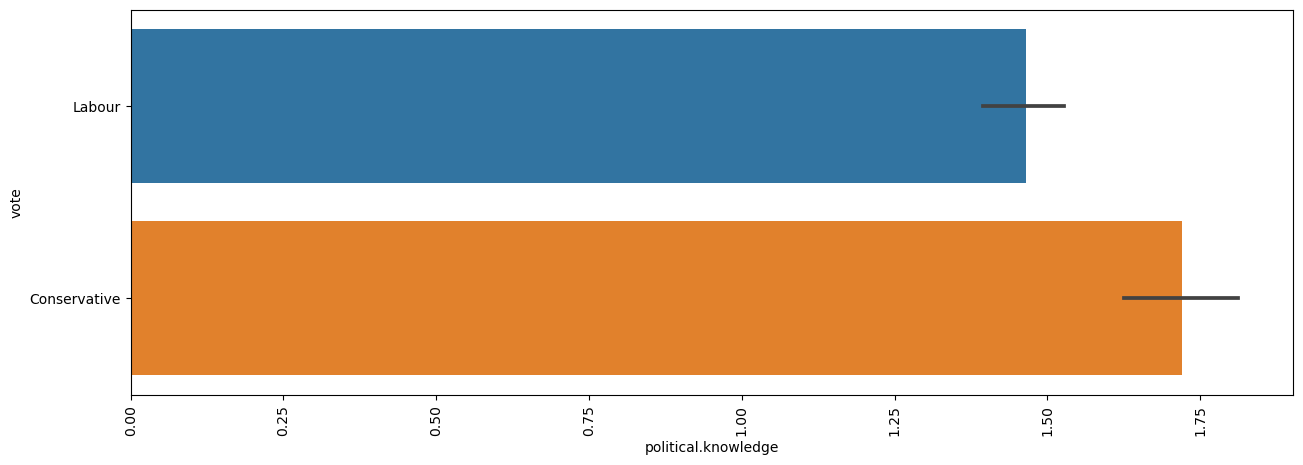

In [8]:
#Univariate Analysis
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5)) 
sns.barplot(x=df['political.knowledge'], y=df['vote']) 
plt.xticks(rotation='90') 

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

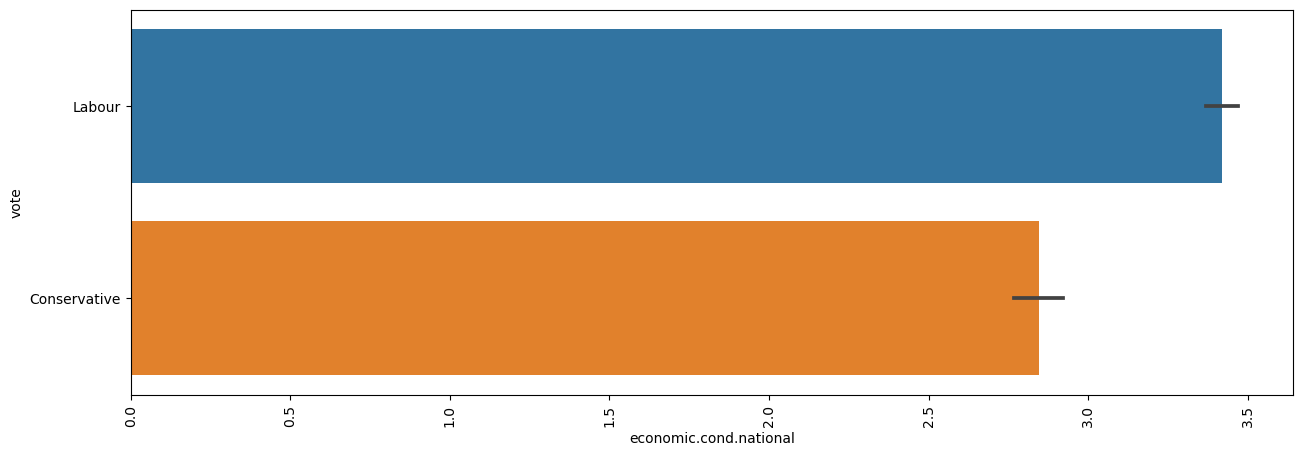

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5)) 
sns.barplot(x=df['economic.cond.national'], y=df['vote']) 
plt.xticks(rotation='90') 

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

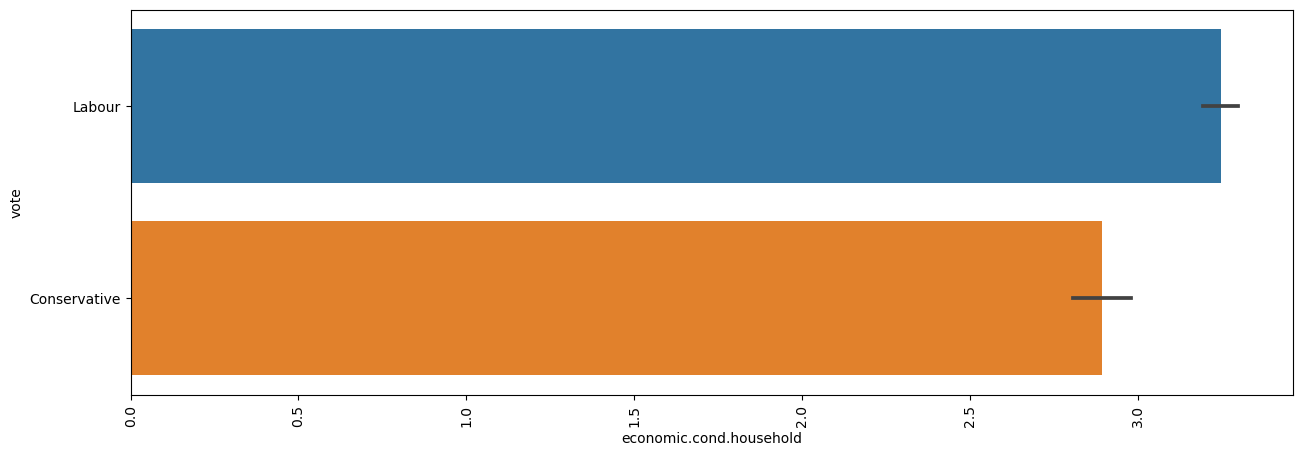

In [10]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5)) 
sns.barplot(x=df['economic.cond.household'], y=df['vote']) 
plt.xticks(rotation='90') 

<AxesSubplot:>

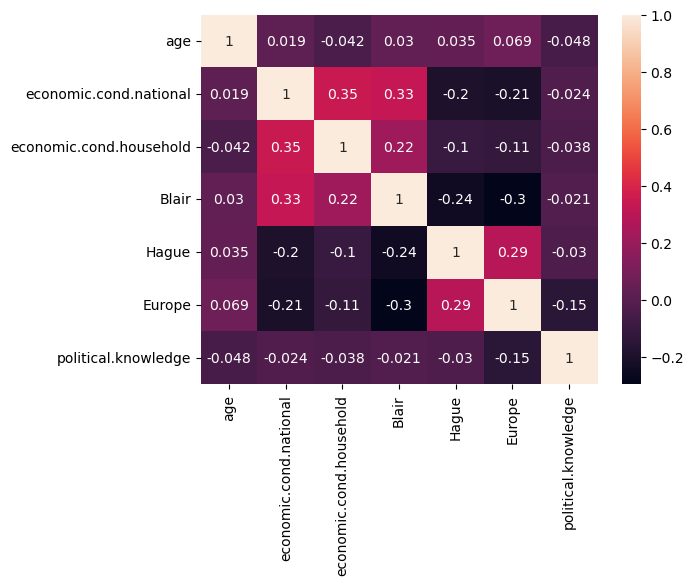

In [11]:
#Multivariate Analysis - Correlation
sns.heatmap(df.corr(), annot=True)

### Data Pre-processing

In [12]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
encoder = LabelEncoder()

In [13]:
# Using map function
df['vote'] = df['vote'].map({'Conservative': 1, 'Labour': 0})

In [15]:
X = df.drop(['vote'], axis=1)
y = df['vote']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, shuffle=True)

In [16]:
# Scaling the numerical features
numeric_features = []

for col in X.columns:
    if(X[col].dtype == "float" or X[col].dtype == "int64"):
        numeric_features.append(col)

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.fit_transform(X_test[numeric_features])

In [17]:
# Encoding the categorical features
categorical_features = X.select_dtypes(include=['object']).columns

for col in categorical_features:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.fit_transform(X_test[col])

### Model Building

In [18]:
#K Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [20]:
#Bagging Classifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
clf = BaggingClassifier(estimator=SVC(),
                        n_estimators=10, random_state=0)
clf.fit(X_train, y_train)


BaggingClassifier(estimator=SVC(), random_state=0)

In [21]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Train AdaBoostClassifier using weak classifiers
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
                         n_estimators=5,
                         algorithm='SAMME.R',
                         learning_rate=0.5,
                         random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=5, random_state=42)

### Model Performance evaluation

KNN Model

In [92]:
y_pred_knn = knn.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score of KNN Classifier is : {acc_knn}")

Accuracy Score of KNN Classifier is : 0.8318777292576419


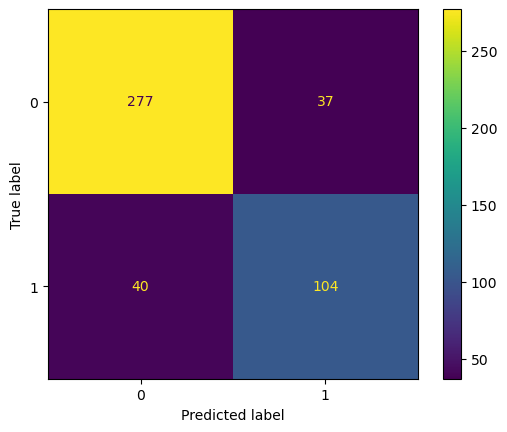

In [93]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [27]:
y_knn_prob = knn.predict_proba(X_test)[:, 1] 

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score 
fpr, tpr, thresholds = roc_curve(y_test, y_knn_prob, pos_label=1)

In [31]:
# Compute the ROC AUC score 
roc_auc_knn = roc_auc_score(y_test, y_knn_prob) 
roc_auc_knn

0.8574730184005661

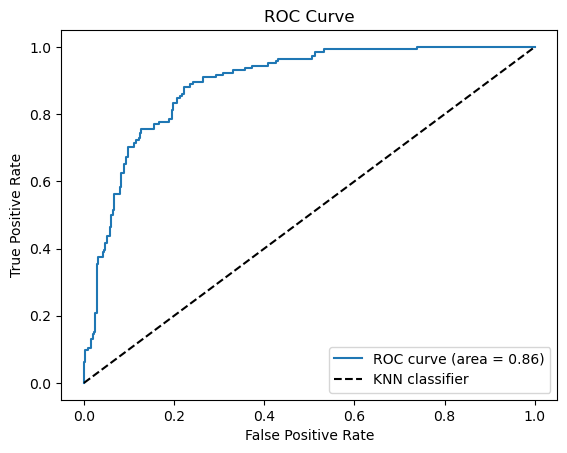

In [39]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_knn) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='KNN classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

Naive Bayes Model 

In [90]:
y_pred_naive = classifier.predict(X_test)
acc_naive = accuracy_score(y_test, y_pred_naive)
print(f"Accuracy Score of Naive Bayes Classifier is : {acc_naive}")

Accuracy Score of Naive Bayes Classifier is : 0.8318777292576419


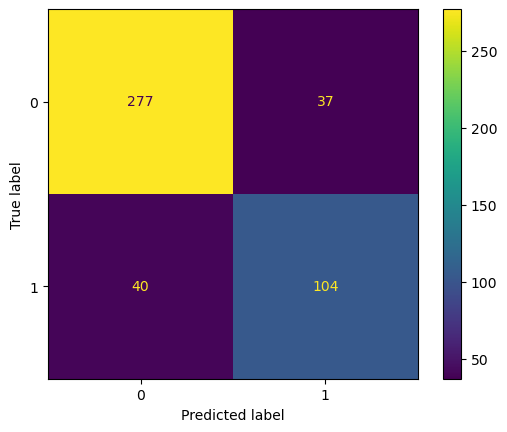

In [91]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_naive)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [34]:
# Compute the ROC AUC score
y_naive_prob = classifier.predict_proba(X_test)[:, 1] 

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score 
fpr, tpr, thresholds = roc_curve(y_test, y_naive_prob, pos_label=1)

In [36]:
 roc_auc_naive = roc_auc_score(y_test, y_naive_prob) 
roc_auc_naive

0.8915870488322718

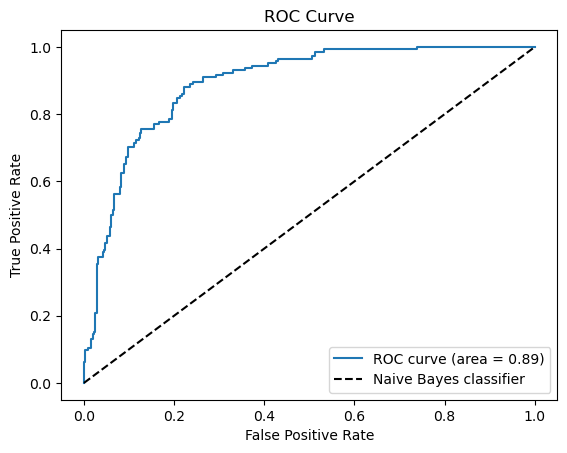

In [38]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_naive) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Naive Bayes classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

Support Vector Machine Bagging Model

In [86]:
y_pred_svm = clf.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy Score of SVM is : {acc_svm}")

Accuracy Score of SVM is : 0.8384279475982532


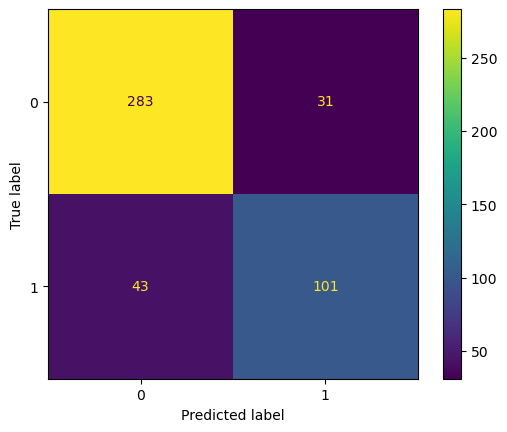

In [87]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [48]:
# Compute the ROC AUC score 
y_svm_prob = clf.predict_proba(X_test)[:, 1] 

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_svm_prob, pos_label=1)

In [50]:
roc_auc_svm = roc_auc_score(y_test, y_svm_prob) 
roc_auc_svm

0.8536911712668083

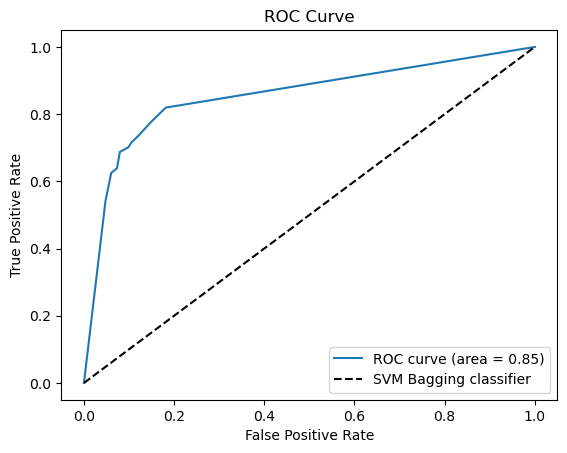

In [59]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_svm) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='SVM Bagging classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

Adaboost Classifier Model

In [88]:
y_pred_boost = ada.predict(X_test)
acc_boost = accuracy_score(y_test, y_pred_boost)
print(f"Accuracy Score of Adaboost is : {acc_boost}")

Accuracy Score of Adaboost is : 0.8406113537117904


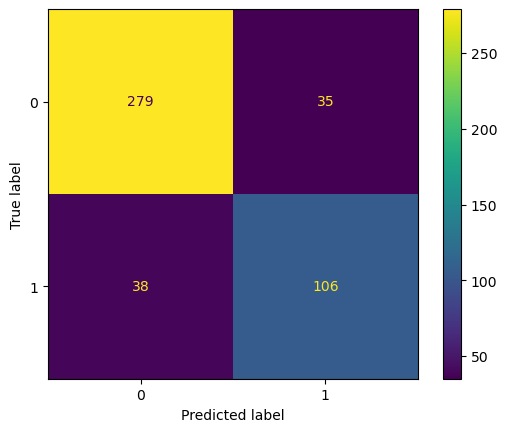

In [89]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_boost)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [54]:
# Compute the ROC AUC score 
y_ada_prob = clf.predict_proba(X_test)[:, 1] 

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_ada_prob, pos_label=1)

In [56]:
roc_auc_ada = roc_auc_score(y_test, y_ada_prob) 
roc_auc_ada

0.8536911712668083

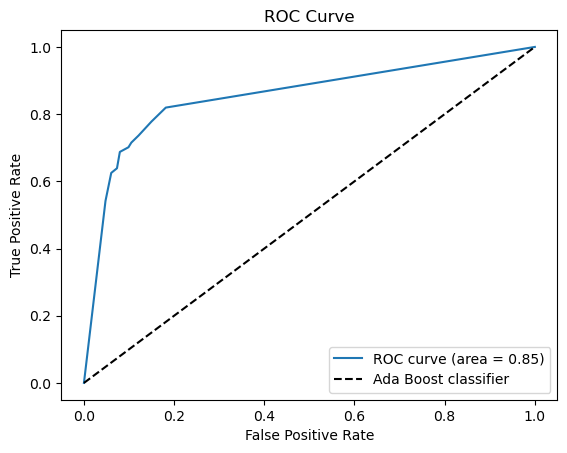

In [58]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_svm) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Ada Boost classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

Model Performance improvement

In [75]:
param_grid = {
     'C':[1,10,100,1000],
    'gamma':[1,0.1,0.001,0.0001], 
    'kernel':['linear','rbf']}

In [76]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(clf, params, n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(estimator=SVC(), random_state=0),
             n_jobs=-1,
             param_grid={'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600,
                                          700, 800, 900, 1000]},
             scoring='accuracy')

In [78]:
svm_pred = gs.predict(X_test)
svm_acc_gs = accuracy_score(y_test, svm_pred)
clf_svm_gs = classification_report(y_test, svm_pred)
print(f" Improved Accuracy Score of SVM bagging is : {svm_acc_gs}")
print(f"Classification Report : \n{clf_svm_gs}")

 Improved Accuracy Score of SVM bagging is : 0.8384279475982532
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       314
           1       0.77      0.69      0.73       144

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



In [82]:
param_grid = {"n_estimators":5,
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[10, 100, 200, 250],
              "learning_rate":  [0.05, 0.5, 1.5, 2.5]}

In [83]:
grid_ada_clf = GridSearchCV(ada, param_grid, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_ada_clf.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                           random_state=42),
                                          learning_rate=0.5, n_estimators=5,
                                          random_state=42),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.05, 0.5, 1.5, 2.5],
                         'n_estimators': [10, 100, 200, 250]},
             scoring='accuracy', verbose=1)

In [84]:
ada_pred = grid_ada_clf.predict(X_test)
ada_acc_gs = accuracy_score(y_test, ada_pred)
clf_ada_gs = classification_report(y_test, ada_pred)
print(f" Improved Accuracy Score of Adaboosting Model is : {ada_acc_gs}")
print(f"Classification Report : \n{clf_ada_gs}")

 Improved Accuracy Score of Adaboosting Model is : 0.8449781659388647
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       314
           1       0.74      0.77      0.76       144

    accuracy                           0.84       458
   macro avg       0.82      0.82      0.82       458
weighted avg       0.85      0.84      0.85       458



# Problem 2 - Define the problem and Perform Exploratory Data Analysis

In [221]:
df1 = pd.read_excel(r"C:\Users\dhana\OneDrive\Desktop\Project_Speech.xlsx")
df1.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [222]:
df1["Speech"] ="".join([str(i) for a,i in enumerate(df1["Speech"])])
print(df1["Speech"])

0    On each national day of inauguration since 178...
1    On each national day of inauguration since 178...
2    On each national day of inauguration since 178...
Name: Speech, dtype: object


In [223]:
# CHARACTER-COUNT
df1['char_count'] = df1['Speech'].apply(lambda x: len(str(x)))
df1['char_count'].sum()

76290

In [224]:
#SENTENCE COUNT
df1['sent_count'] = len(df1['Speech'])
df1['sent_count'].sum()

9

In [225]:
# WORD-COUNT
df1['word_count'] = df1['Speech'].apply(lambda x: len(str(x).split()))
df1['word_count'].sum()

13362

Problem 2 - Text cleaning


In [242]:
import re
import nltk as nlp
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [243]:
def convert_lower(text):
    return text.lower()

# Apply convert_lower to the 'text' column
df1["Speech"] = df1["Speech"].apply(convert_lower)

In [244]:
def remove_special(text):
    clean_text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    return clean_text

# Apply remove_special to the 'text' column
df1["Speech"]= df1["Speech"].apply(remove_special)

In [245]:
nlp.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [246]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [247]:
def remove_stopwords(text):
    stopwords_list = stopwords.words("english")
    tokens = text.split()
    clean_tokens = [token for token in tokens if token not in stopwords_list]
    return " ".join(clean_tokens)

# Apply remove_stopwords to the 'text' column
df1["Speech"] = df1["Speech"].apply(remove_stopwords)

In [248]:
from nltk.stem import PorterStemmer

# Create an instance of PorterStemmer
porter = PorterStemmer()

# Define a function to apply stemming
def stem_words(text):
    tokens = text.split()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

# Apply stem_words to the 'text' column
df1["Speech"] = df1["Speech"].apply(stem_words)

In [262]:
from collections import Counter 
split_it = df1["Speech"].sum() 
Counter = Counter(split_it)   
# most_common() produces frequently encountered 
most_occur = Counter.most_common(3)
most_occur

[(' ', 7458), ('e', 4311), ('n', 3093)]

Problem 2 - Plot Word cloud of all three speeches

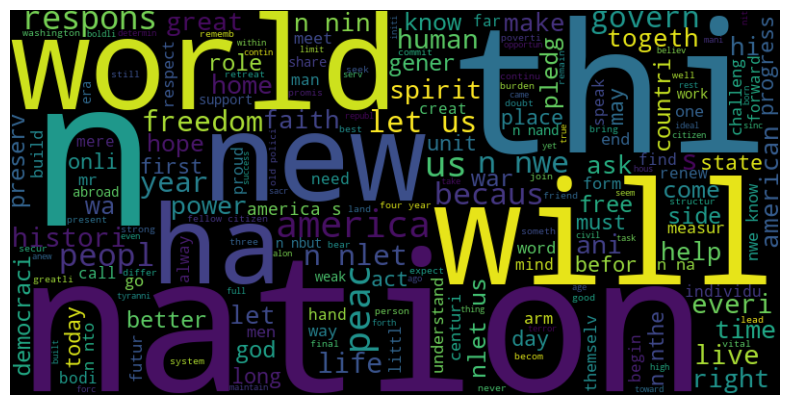

In [185]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df1['Speech']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()